<a href="https://colab.research.google.com/github/cocozxh/MachineLearning_UTAustin/blob/main/HW2/ICA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [7]:
import scipy.io as scio
import numpy as np
import math
import matplotlib.pyplot as plt
import random

In [8]:
data = scio.loadmat('/content/gdrive/MyDrive/UTAustin_2021Fall/Machine_Learning/HW2/sounds.mat')

In [9]:
save_dir = '/content/gdrive/MyDrive/UTAustin_2021Fall/Machine_Learning/HW2/test1'

In [10]:
color_list = ['r','c','m','b','g']

In [11]:
Selected = [0,1]
U = data['sounds'][Selected,:]
U

array([[ 0.00000000e+00,  6.40869141e-03, -1.06811523e-03, ...,
         6.10351562e-05, -3.05175781e-05,  3.05175781e-05],
       [ 2.59399414e-03,  7.01904297e-03,  6.22558594e-03, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

In [12]:
n = U.shape[0]
t = U.shape[1]
m = n

In [13]:
A = [[random.random() for e in range(n)] for e in range(m)]

In [14]:
A = np.array(A)
A.shape

(2, 2)

In [15]:
f=open(save_dir+'/A.txt','w') 
np.savetxt(save_dir+'/A.txt',A,delimiter=',')
f.close()
A

array([[0.9770787 , 0.3120309 ],
       [0.33916394, 0.66915107]])

In [16]:
X = np.matmul(A,U)
X

array([[ 8.09406324e-04,  8.45195418e-03,  8.98942528e-04, ...,
         5.96361514e-05, -2.98180757e-05,  2.98180757e-05],
       [ 1.73577396e-03,  6.87039711e-03,  3.80359133e-03, ...,
         2.07009238e-05, -1.03504619e-05,  1.03504619e-05]])

In [17]:
X.shape

(2, 44000)

In [18]:
np.mean(X, axis = 1)

array([-0.00149277, -0.00058966])

In [19]:
X = X - np.reshape(np.mean(X, axis = 1),(m,1))

In [20]:
np.mean(X, axis = 1)

array([2.80583637e-18, 4.10025549e-20])

In [21]:
# e_vals, e_vecs = np.linalg.eig(X.dot(X.transpose()))
# independent_X = e_vecs.dot(np.diag(np.power(e_vals,(-1/2)))).dot(e_vecs.transpose()).dot(X)

In [22]:
W = np.random.rand(A.shape[1],A.shape[0])/1000000

In [23]:
f=open(save_dir+'/W.txt','w')
np.savetxt(save_dir+'/W.txt',W,delimiter=',')
f.close()
W

array([[8.85553513e-07, 7.31337474e-07],
       [2.66314388e-07, 3.11962001e-07]])

In [24]:
Y = np.matmul(W,X)

In [25]:
Z = 1/(1+np.exp(-Y))

In [26]:
R_max = 100000
miu = 0.0001
MSE = []

In [28]:
for i in range(R_max):
  delta_W = np.matmul(miu*(np.identity(W.shape[0])+np.matmul(1-2*Z,Y.transpose())),W)
  W = W+delta_W
  Y = np.matmul(W,X)
  Z = 1/(1+np.exp(-Y))
  error = np.mean(np.square(U-Y))
  # print("iteration "+str(i)+" =======> err "+str(error))
  MSE.append(error)

In [29]:
def visualize_signal(signal, fig_name):
    n = len(signal)
    i = 0
    columns = 1
    rows = n
    fig = plt.figure(figsize=(5, 5))
    ax = []
    for i in range(columns*rows):
        ax.append(fig.add_subplot(rows, columns, i+1) )
        plt.plot(signal[i], color_list[i])
        plt.xlabel('Time')
        plt.ylabel('Amplitude')
    plt.savefig(save_dir+'/%s.png' % (fig_name))
    plt.close()

In [30]:
visualize_signal(U,'U')
visualize_signal(Y,'Y')
visualize_signal(X,'X')

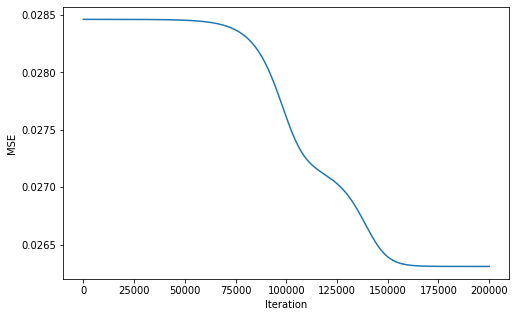

In [31]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
plt.plot(MSE)
# plt.xticks(fontsize=20)
# plt.yticks(fontsize=20)
plt.xlabel("Iteration")
plt.ylabel("MSE")
plt.savefig(save_dir+'/MSE.png')
plt.show()

In [33]:
def corrcoef(X,Y):
  x_mean = np.mean(X)
  y_mean = np.mean(Y)
  a = np.sum((X-x_mean)*(Y-y_mean))
  b = np.sqrt(np.sum(np.square(X-x_mean))*np.sum(np.square(Y-y_mean)))
  return a/b

In [34]:
corrcoef(U[0],Y[1])

-0.0675581884641867

In [36]:
f=open(save_dir+'/correlation.txt','w')
A = np.array([[0,1],[1,0]])
# A = np.array([[0,1,2],[0,2,1],[1,0,2],[1,2,0],[2,1,0],[2,0,1]])
maxCorrelation = np.array([])
maxMeanCorrelation = 0
HighestCorrelation = 0
for i in range(A.shape[0]):
  correlation = np.array([])
  for j in range(A.shape[1]):
    correlation = np.append(correlation, [corrcoef(U[j],Y[A[i][j]])])
    if correlation[j] > HighestCorrelation:
      HighestCorrelation = correlation[j]
  print(correlation)  
  f.write(str(correlation))
  f.write('\n')
  if maxMeanCorrelation<np.mean(correlation):
    maxMeanCorrelation = np.mean(correlation)
    maxCorrelation = correlation
# f.close()

[0.99771514 0.99806129]
[-0.06755819  0.06224176]


In [37]:
HighestCorrelation

0.998061286206259

In [38]:
maxMeanCorrelation

0.9978882108382812

In [36]:
f.write('HighestCorrelation='+str(HighestCorrelation))
f.write('\n')
f.write('maxMeanCorrelation='+str(maxMeanCorrelation))
f.close()